In [ ]:
'''
Name: Claire Morehouse
Date: November 21st, 2020
Description: This lab takes data regarding the locations of international airports and flight routes and creates an output of a histogram
that visualizes the frequency of distances for international flights
Inputs: Airport.dat, Routes.dat, camp_stats.csv
Outputs: Airports for a specific country, a dictionary of Airport IDS and latitude, a dictionary of Airport IDS and longitude, a list of route
distances, a histogram that visualizes those distances
'''

In [46]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

In [47]:
# Experiement with Comma-separated values
# import and open csv 
import csv
f=open("Camp_stats.csv")
# for each row, print the row
for row in csv.reader(f):
    print(row)

['Refugee_Camp_Name', 'Country', 'Population_2006', 'Population_2014']
['Kakuma', 'Kenya', '90457', '153959']
['Hagadera', 'Kenya', '59185', '106968']
['Adjumani', 'Uganda', '54051', '96926']
['Dagahaley', 'Kenya', '39526', '88486']
['Zaatari', 'Jordan', '0', '84773']


In [48]:
#open csv
import csv
f = open("airports.dat")
# for each row, show field 1
for row in csv.reader(f):
    print(row[1])

Streaming output truncated to the last 5000 lines.
Guanare Airport
Higuerote Airport
Andrés Miguel Salazar Marcano Airport
Josefa Camejo International Airport
San Juan de Los Morros Airport
La Fria Airport
La Orchila Airport
La Chinita International Airport
Alberto Carnevalli Airport
Del Caribe Santiago Mariño International Airport
Simón Bolívar International Airport
Maturín Airport
Cacique Aramare Airport
General Bartolome Salom International Airport
Paramillo Airport
General Manuel Carlos Piar International Airport
Palmarito Airport
San Antonio Del Tachira Airport
Santa Bárbara de Barinas Airport
Santa Elena de Uairen Airport
Mayor Buenaventura Vivas International Airport
Sub Teniente Nestor Arias Airport
San Fernando De Apure Airport
San Tomé Airport
Santa Bárbara del Zulia Airport
Tucupita Airport
Tumeremo Airport
Arturo Michelena International Airport
Dr. Antonio Nicolás Briceño Airport
Valle de La Pascua Airport
Linden Airport
Lethem Airport
V.C. Bird International Airport
Sir Gr

In [ ]:
# Challenge 1
import csv #import csv and open
f = open("airports.dat")
def airport(name): #create function that passes name argument 
  for row in csv.reader(f): #create for loop that for each row in the csv
      if row[3] == name: #if the row is index 3 field and == the argument passes
        print(row[1]) #print the index 0 field (airports)
airport('Russia') #input Russia, could be other country

In [ ]:
# Challenge 2
import csv #import csv and open
f = open("airports.dat")
latitudes = {} #create empty dictionaries 
longitudes = {}
for row in csv.reader(f): #for loop that for each row in csv
  latitudes[int(row[0])] = float(row[6]) # field that is index 0 and field that is index 6 are key and value in dictionary. change to float from string 
  longitudes[int(row[0])] = float(row[7]) #field that i s index 0 and field that is index 7 are key and value in dictionary. change to float from string 
print(latitudes) #print to check
print(longitudes) #print to check


  



{1: -6.081689834590001, 2: -5.20707988739, 3: -5.826789855957031, 4: -6.569803, 5: -9.443380355834961, 6: -3.58383011818, 7: 61.1604995728, 8: 64.19090271, 9: 67.0122218992, 10: 76.5311965942, 11: 65.66000366210938, 12: 65.2833023071289, 13: 64.295601, 14: 65.952301, 15: 66.05809783935547, 16: 63.985000610352, 17: 65.555801, 18: 64.1299972534, 19: 66.133301, 20: 63.42430114746094, 21: 46.48500061035156, 22: 50.0564002991, 23: 44.639702, 24: 51.3918991089, 25: 49.079833, 26: 68.534401, 27: 49.13249969482422, 28: 48.33060073852539, 29: 64.29889678960001, 30: 49.950801849365234, 31: 49.91, 32: 69.1081008911, 33: 49.054970224899996, 34: 49.2963981628, 35: 47.007801, 36: 47.990799, 37: 67.816704, 38: 52.0750007629, 39: 49.1528015137, 40: 70.4860992432, 41: 64.1932983398, 42: 64.04309844970703, 43: 61.37110137939453, 44: 49.4681015015, 45: 49.21080017089844, 46: 58.4221992493, 47: 51.100799560546875, 48: 55.7422981262207, 49: 53.309700012200004, 50: 61.0942001343, 51: 49.2103004456, 52: 53.5

In [ ]:
# Copy of geo_distance.py
# Using the Haversine formula for geographic Great Circle Distance
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
  radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius
  # Lat,long are in degrees but we need radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))

  return distance

In [ ]:
# Check Code to import and check the geo_distance.py file to make sure it works.
geo_distance.distance(-37.814,144.963,52.519,13.406) # Melbourne to Berlin in km!

15973.237754707652

In [ ]:
#Challenge 3
import csv #import and open csv
f = open("routes.dat")
routelist = [] #create empty list
for row in csv.reader(f): #for each row in csv
  if row[3] != "\\N" and row[5] != "\\N": #don't pick up rows with the /N in them, messes up the loop if not
    source_airport = int(row[3]) #create source variable
    dest_airport = int(row[5]) #create destination variable
    if source_airport in latitudes and dest_airport in latitudes: # only for source airports that also have lats in the dictionary 
      routelist.append(distance(latitudes[source_airport], longitudes[source_airport], latitudes[dest_airport], longitudes[dest_airport])) #append distances
print(routelist)

[1506.825604458928, 1040.4383197669074, 448.164908709546, 770.5085001497805, 1338.6314665862067, 715.6493504840489, 892.3827877543458, 951.4321982829719, 1171.8814952837668, 1008.2531100895807, 1685.4265243719858, 1171.8814952837668, 1506.825604458928, 1040.4383197669074, 770.5085001497805, 715.6493504840489, 1008.2531100895807, 1216.8445674824818, 723.523203520023, 1216.8445674824818, 1372.8864143629512, 1464.056935072568, 448.164908709546, 892.3827877543458, 1685.4265243719858, 1372.8864143629512, 554.703359662419, 1012.6027135761158, 1557.1718220176435, 1324.6117527543267, 1338.6314665862067, 1370.297258632382, 723.523203520023, 554.703359662419, 1012.6027135761158, 1324.6117527543267, 1370.297258632382, 951.4321982829719, 1464.056935072568, 1557.1718220176435, 488.33962159397527, 1199.3591559200308, 1338.6314665862067, 608.6430610264199, 488.33962159397527, 608.6430610264199, 882.1865409507233, 1458.824309959064, 517.4862726798776, 1134.5379651044464, 1860.015151572239, 1967.487894

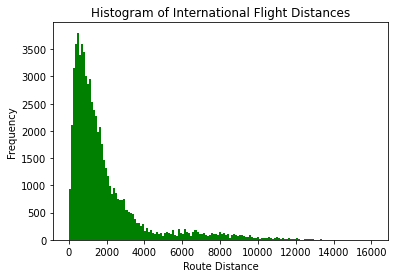

In [43]:
#Challenge 4
#import libraries needed 
import numpy as np
import matplotlib.pyplot as plt
# set x equal to the data
x = routelist
# three key arguments data, number of bins and color *green* esablishes
data, bins, color = plt.hist(x, 150, facecolor='g')
#label axis and pick title
plt.xlabel('Route Distance')
plt.ylabel('Frequency')
plt.title('Histogram of International Flight Distances')
#display figure
plt.show()



